Titanic data analysis

In [ ]:
import pandas as pd
import numpy as np

Read Data

In [ ]:
df = pd.DataFrame(pd.read_csv('/content/train (1).csv'))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Number of rows and columns

In [ ]:
df.shape

(891, 12)

Handling Null Values

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Seperating out the columns which have > 35% missing values.

In [ ]:
drop_col = df.isnull().sum()[df.isnull().sum()>(35/100*df.shape[0])]
drop_col

Cabin    687
dtype: int64

In [ ]:
drop_col.index

Index(['Cabin'], dtype='object')

In [ ]:
df.drop(drop_col.index, axis=1, inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Missing value imputation using mean

In [ ]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
df['Embarked'].fillna('S',inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Correlation Heatmap

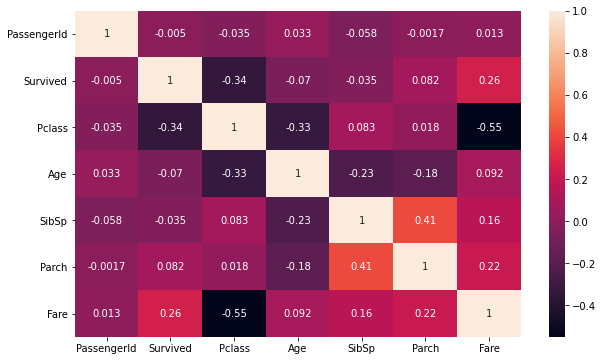

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Correlation matrix
cor = df.corr()

# Plotting Heatmap
plt.figure(figsize = (10,6))
sns.heatmap(cor,annot = True)

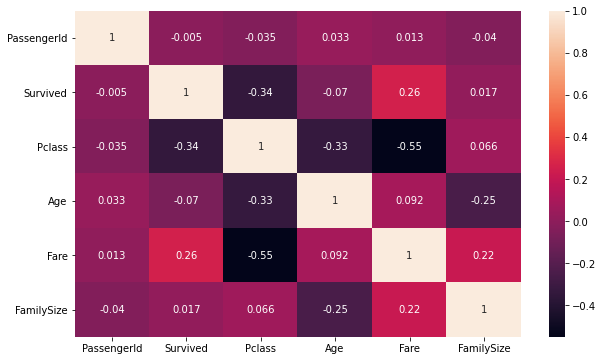

In [ ]:
df['FamilySize'] = df['SibSp']+df['Parch']
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
# Correlation matrix
cor = df.corr()

# Plotting Heatmap
plt.figure(figsize = (10,6))
sns.heatmap(cor,annot = True)

FamilySize is weakly correlated with Survival rate around 0.017

So we'll check whether being alone can affect survival rate

In [ ]:
df['Alone']=[0 if df['FamilySize'][i]>0 else 1 for i in df.index]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1


In [ ]:
df.groupby(['Alone'])['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

Person travelling alone has lesser chance of surviving as compared to person travelling with family and this maybe due to prioritisation because of economic status.

In [ ]:
df[['Alone','Fare']].corr()

,Alone,Fare
Alone,1.000000,-0.271832
Fare,-0.271832,1.000000


If person was not alone, the chance the ticket price is higher is high

In [ ]:
df['Sex'] = [0 if df['Sex'][i]=='male' else 1 for i in df.index]
df.groupby(['Sex'])['Survived'].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

Females have higher chance of survival than males.

In [ ]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

**Conclusion**



1.   Females were prioritized over men.
2.   People of rich class have higher survival rate.
3.   Passengers with family have higher survival rate.


